# 单因子数据可视化

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('./data/HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [17]:
# 先剔除异常值
df = df.dropna(axis=0,how='any')
df = df[df['salary']!='nme']
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [37]:
# sns指定样式
sns.set_style(style='whitegrid')
sns.set_context(context='paper',font_scale=1.4)
sns.set_palette(sns.color_palette('RdBu',n_colors=7))

柱状图,横坐标是类别，顶部为有意义的值

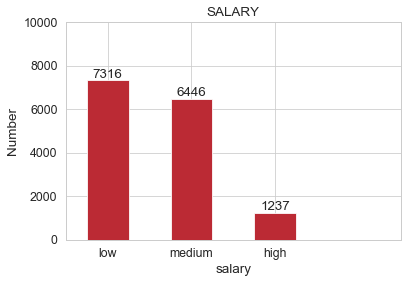

In [38]:
# 绘制salary的柱状图,横坐标是类别，顶部为有意义的值
plt.title('SALARY')
plt.xlabel('salary')
plt.ylabel('Number')
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
plt.axis([0,4,0,10000])
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.5)
for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va='bottom')
plt.show()

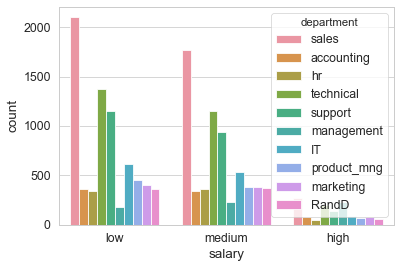

In [40]:
# 使用seaborn进行绘图
sns.countplot(x='salary',hue='department',data=df)
plt.show()

直方图，横坐标为区间，有意义的是直方图的面积

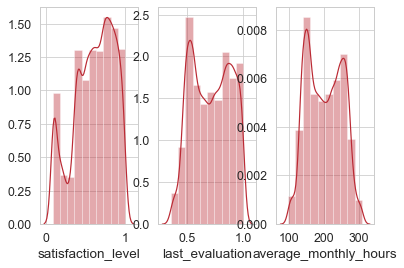

In [41]:
# 绘制直方图，横坐标为区间，有意义的是直方图的面积
f = plt.figure()
f.add_subplot(1,3,1)
# 禁用分布图
# sns.distplot(df['satisfaction_level'],bins=10,kde=False)
# 禁用直方图
# sns.distplot(df['satisfaction_level'],bins=10,hist=False)
sns.distplot(df['satisfaction_level'],bins=10)
f.add_subplot(1,3,2)
sns.distplot(df['last_evaluation'],bins=10)
f.add_subplot(1,3,3)
sns.distplot(df['average_monthly_hours'],bins=10)
plt.show()

箱线图,展示异常值的位置

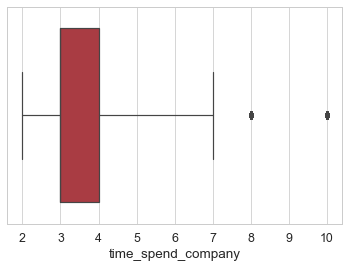

In [42]:
# 绘制箱线图,展示异常值的位置,saturation指上四分位数，whis指间隔倍数
sns.boxplot(x=df['time_spend_company'],saturation=0.75,whis=3)
plt.show()

折线图，指数据变化的趋势，横轴一般是时间或者规模，通过折线图可以看到数据的走势和范围

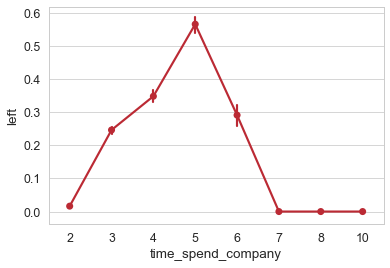

In [43]:
# 折线图，指数据变化的趋势，横轴一般是时间或者规模，通过折线图可以看到数据的走势和范围
# 绘制随着在公司呆的时间，离职的变化趋势

# 第一种画法
# sub_df = df.groupby('time_spend_company').mean()
# sns.pointplot(sub_df.index,sub_df['left'])

# 第二种画法
sns.pointplot(x='time_spend_company',y='left',data=df)
plt.show()

饼图主要用来做结构分析

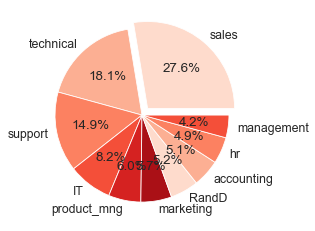

In [44]:
# seaborn中没有饼图，使用plt画
# 饼图主要用来做结构分析
lbs = df['department'].value_counts().index
# 把某个部门单独强调
explodes = [0.1 if i=='sales' else 0 for i in lbs]
plt.pie(df['department'].value_counts(normalize=True),explode=explodes,labels=lbs,autopct='%1.1f%%',colors=sns.color_palette('Reds'))
plt.show()

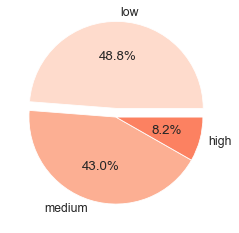

In [45]:
lbs = df['salary'].value_counts().index
explodes = [0.1 if i=='low' else 0 for i in lbs]
plt.pie(df['salary'].value_counts(normalize=True),explode=explodes,labels=lbs,autopct='%1.1f%%',colors=sns.color_palette('Reds'))
plt.show()